Analysis for San Diego County

In [1]:
# Import all dependencies 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import datetime
from datetime import datetime

In [2]:
# load county data
counties = pd.read_csv('us-counties.csv')
counties.sample(5)

,date,county,state,fips,cases,deaths
175782,5/25/2020,Hendry,Florida,12051.0,321,12
716845,11/10/2020,Appanoose,Iowa,19007.0,466,3
352909,7/20/2020,Armstrong,Pennsylvania,42005.0,119,6
635517,10/16/2020,Gooding,Idaho,16047.0,433,1
344397,7/18/2020,Cleburne,Arkansas,5023.0,153,5


In [3]:
# find sd county
san_diego = counties[(counties['county']=='San Diego') & (counties['state']=='California')]
san_diego.columns

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [4]:
san_diego['datetime'] = pd.to_datetime(san_diego['date'])
san_diego

,date,county,state,fips,cases,deaths,datetime
118,2/10/2020,San Diego,California,6073.0,1,0,2020-02-10
128,2/11/2020,San Diego,California,6073.0,1,0,2020-02-11
138,2/12/2020,San Diego,California,6073.0,1,0,2020-02-12
149,2/13/2020,San Diego,California,6073.0,1,0,2020-02-13
160,2/14/2020,San Diego,California,6073.0,1,0,2020-02-14
...,...,...,...,...,...,...,...
709783,11/8/2020,San Diego,California,6073.0,60232,908,2020-11-08
713027,11/9/2020,San Diego,California,6073.0,60633,938,2020-11-09
716271,11/10/2020,San Diego,California,6073.0,61116,915,2020-11-10
719515,11/11/2020,San Diego,California,6073.0,61148,915,2020-11-11


In [5]:
#san_diego['datetime'] = pd.to_datetime(san_diego['date'])
#san_diego

san_diego.sort_values(by = 'datetime')
san_diego = san_diego.reset_index()

# Groupby to consolidate cases by entire region
san_diego = san_diego.groupby(["datetime"]).sum()
  
    # Sort by datetime and reset index
san_diego.sort_values(by = 'datetime')
san_diego = san_diego.reset_index()
    #wnc_group.tail
    
    # Finish datetime conversion
san_diego['datetime'] = pd.to_datetime(san_diego['datetime'])
san_diego['day'] = san_diego['datetime'].map(lambda x: x.day)
san_diego['month'] = san_diego['datetime'].map(lambda x: x.month)
san_diego['year'] = san_diego['datetime'].map(lambda x: x.year)

    # Now create new column for growth rate
    #us['growth_rate'] = us['cases'].pct_change()
    # Drop null value
san_diego = san_diego.dropna()
san_diego = san_diego
san_diego.tail(10)


,datetime,index,fips,cases,deaths,day,month,year
267,2020-11-03,693564,6073.0,57765,901,3,11,2020
268,2020-11-04,696807,6073.0,58169,904,4,11,2020
269,2020-11-05,700052,6073.0,58699,904,5,11,2020
270,2020-11-06,703296,6073.0,59179,907,6,11,2020
271,2020-11-07,706539,6073.0,59719,908,7,11,2020
272,2020-11-08,709783,6073.0,60232,908,8,11,2020
273,2020-11-09,713027,6073.0,60633,938,9,11,2020
274,2020-11-10,716271,6073.0,61116,915,10,11,2020
275,2020-11-11,719515,6073.0,61148,915,11,11,2020
276,2020-11-12,722759,6073.0,62397,918,12,11,2020


In [6]:
san_diego['growth_rate'] = san_diego['deaths'].pct_change()

In [ ]:
san_diego

In [8]:
sd = san_diego.drop([273])

In [12]:
sd

,datetime,index,fips,cases,deaths,day,month,year,growth_rate
0,2020-02-10,118,6073.0,1,0,10,2,2020,NaN
1,2020-02-11,128,6073.0,1,0,11,2,2020,NaN
2,2020-02-12,138,6073.0,1,0,12,2,2020,NaN
3,2020-02-13,149,6073.0,1,0,13,2,2020,NaN
4,2020-02-14,160,6073.0,1,0,14,2,2020,NaN
...,...,...,...,...,...,...,...,...,...
271,2020-11-07,706539,6073.0,59719,908,7,11,2020,0.001103
272,2020-11-08,709783,6073.0,60232,908,8,11,2020,0.000000
274,2020-11-10,716271,6073.0,61116,915,10,11,2020,-0.024520
275,2020-11-11,719515,6073.0,61148,915,11,11,2020,0.000000


In [11]:
sd.diff()

,datetime,index,fips,cases,deaths,day,month,year,growth_rate
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1 days,10.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
2,1 days,10.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
3,1 days,11.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
4,1 days,11.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
271,1 days,3243.0,0.0,540.0,1.0,1.0,0.0,0.0,-0.002216
272,1 days,3244.0,0.0,513.0,0.0,1.0,0.0,0.0,-0.001103
274,2 days,6488.0,0.0,884.0,7.0,2.0,0.0,0.0,-0.024520
275,1 days,3244.0,0.0,32.0,0.0,1.0,0.0,0.0,0.024520


In [33]:
# Run model predicting cases

def make_models():
    ''' function to run deaths model'''
    # Make the model
    SD_model = LinearRegression()
    
    # Assign the features and the target
    X_Us = sd[["day", "month", "year"]]
    y_Us = sd[["deaths"]]
    
    # Split the data for training and testing
    X_train_Us, X_test_Us, y_train_Us, y_test_Us = train_test_split(X_Us, y_Us, random_state=42)
    
    # Fit the model with the training data and score it with the testing data
    SD_model.fit(X_train_Us, y_train_Us)
    SD_model.score(X_test_Us, y_test_Us)
    
    # Make Dataframe for the holidays which will be used for the predicitons:
    # Labor Day, Election Day, Thanksgiving, Christmas

    #election_day = {"day": [20], "month": [11], "year": [2020]}
    predict_weeks = {"day": [20, 27, 4, 11, 18, 25], "month": [11, 11, 12, 12, 12, 12], "year": [2020, 2020, 2020, 2020, 2020, 2020]}
    
    
    predict_weeks = pd.DataFrame(predict_weeks)
    #predict_election = pd.DataFrame(election_day)
    predict_weeks["datetime"] = pd.to_datetime((predict_weeks.year*10000 + predict_weeks.month*100+predict_weeks.day).apply(str),format='%Y%m%d')   


    # Predict with the model
    predictions = SD_model.predict(predict_weeks[["day", "month", "year"]])


    # convert predictions from ndarray to list
    preds_arr = []
    for i in predictions:
        preds_arr.append(np.asscalar(i))
    
    # Add the precitions back to the DataFrame and convert from object to 
    # float so we can use it for graphing
    predict_weeks["predicted_deaths"] = predictions
    predict_weeks["predicted_deaths"] = predict_weeks['predicted_deaths'].astype('float')
    
    return predict_weeks

make_models()

,day,month,year,datetime,predicted_deaths
0,20,11,2020,2020-11-20,973.730342
1,27,11,2020,2020-11-27,1002.146971
2,4,12,2020,2020-12-04,1027.882972
3,11,12,2020,2020-12-11,1056.299600
4,18,12,2020,2020-12-18,1084.716228
5,25,12,2020,2020-12-25,1113.132856


In [34]:
def make_models_cases():
    ''' function to run deaths model'''
    # Make the model
    SD_model = LinearRegression()
    
    # Assign the features and the target
    X_Us = sd[["day", "month", "year"]]
    y_Us = sd[["cases"]]
    
    # Split the data for training and testing
    X_train_Us, X_test_Us, y_train_Us, y_test_Us = train_test_split(X_Us, y_Us, random_state=42)
    
    # Fit the model with the training data and score it with the testing data
    SD_model.fit(X_train_Us, y_train_Us)
    SD_model.score(X_test_Us, y_test_Us)
    
    # Make Dataframe for the holidays which will be used for the predicitons:
    # Labor Day, Election Day, Thanksgiving, Christmas

    #election_day = {"day": [20], "month": [11], "year": [2020]}
    predict_weeks = {"day": [20, 27, 4, 11, 18, 25], "month": [11, 11, 12, 12, 12, 12], "year": [2020, 2020, 2020, 2020, 2020, 2020]}
    
    
    predict_weeks = pd.DataFrame(predict_weeks)
    #predict_election = pd.DataFrame(election_day)
    predict_weeks["datetime"] = pd.to_datetime((predict_weeks.year*10000 + predict_weeks.month*100+predict_weeks.day).apply(str),format='%Y%m%d')   


    
    
    # Predict with the model
    predictions = SD_model.predict(predict_weeks[["day", "month", "year"]])


    # convert predictions from ndarray to list
    preds_arr = []
    for i in predictions:
        preds_arr.append(np.asscalar(i))
    
    # Add the precitions back to the DataFrame and convert from object to 
    # float so we can use it for graphing
    predict_weeks["predicted_cases"] = predictions
    predict_weeks["predicted_cases"] = predict_weeks['predicted_cases'].astype('float')
    
    return predict_weeks

make_models_cases()

,day,month,year,datetime,predicted_cases
0,20,11,2020,2020-11-20,57081.120864
1,27,11,2020,2020-11-27,58471.812998
2,4,12,2020,2020-12-04,61417.779120
3,11,12,2020,2020-12-11,62808.471254
4,18,12,2020,2020-12-18,64199.163388
5,25,12,2020,2020-12-25,65589.855522


In [35]:
weeks_cases = make_models_cases()

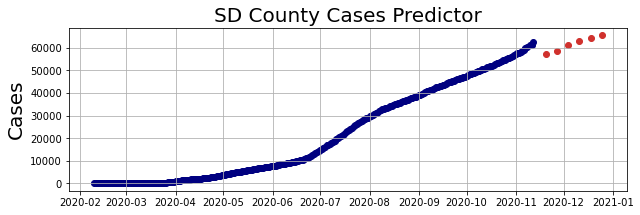

In [36]:
# Graph with Actual Values and Predicitons

plt.figure(figsize = (10, 3))
plt.scatter(weeks_cases['datetime'],weeks_cases['predicted_cases'],c='#d0312d',)
plt.scatter(sd['datetime'],sd['cases'],c='#000080',)
plt.grid(True)
plt.title('SD County Cases Predictor', fontsize = 20)
plt.ylabel('Cases', fontsize = 20)
plt.show()

deaths

In [23]:
weeks_deaths = make_models()

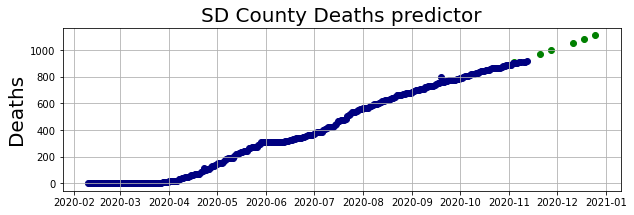

In [28]:
# Graph with Actual Values and Predicitons

plt.figure(figsize = (10, 3))
plt.scatter(weeks_deaths['datetime'],weeks_deaths['predicted_deaths'],c='g',)
plt.scatter(sd['datetime'],sd['deaths'],c='#000080',)
plt.grid(True)
plt.title('SD County Deaths predictor', fontsize = 20)
plt.ylabel('Deaths', fontsize = 20)
plt.show()